# **원클래쓰 - 빅데이터 분석 맛보기 (4기) -**

**수요일 강의 (3강)**

🧑👩 학생 여러분, 원클래쓰 강의에 오신걸 환영합니다 !\
짧은 시간이지만, 여러분들이 강의내용을 기반으로 스스로 학습할 수 있는 능력을 갖출 수 있도록 지원하는게 본 강의의 목적 입니다.

⛵ 이 강의를 "데이터 분석 세상 속으로의 긴 여정을 위한 첫 걸음"으로 이해해 주세요.

**나중을 위한 팁**\
✅ You can only learn data science by doing data science. (실제로 코드를 구현해 봐야 합니다 ~) \
✅ Practice, practice, practice. (연습하고 또 연습하세요, 이번 짧은 강의에서는 모든 세세한 내용을 전부 다룰수 없습니다 ~)\
✅ Free resources everywhere. (인터넷상에는 무료로 데이터 분석 또는 프로그래밍 관련 공부를 할 수 있는 많은 자료들이 존재 합니다. 마지막 날에 파이썬 관련 책 선물이 있을 겁니다 ~)

**여러분의 학습속도에 따라 스케줄의 변동가능성이 있을 예정**

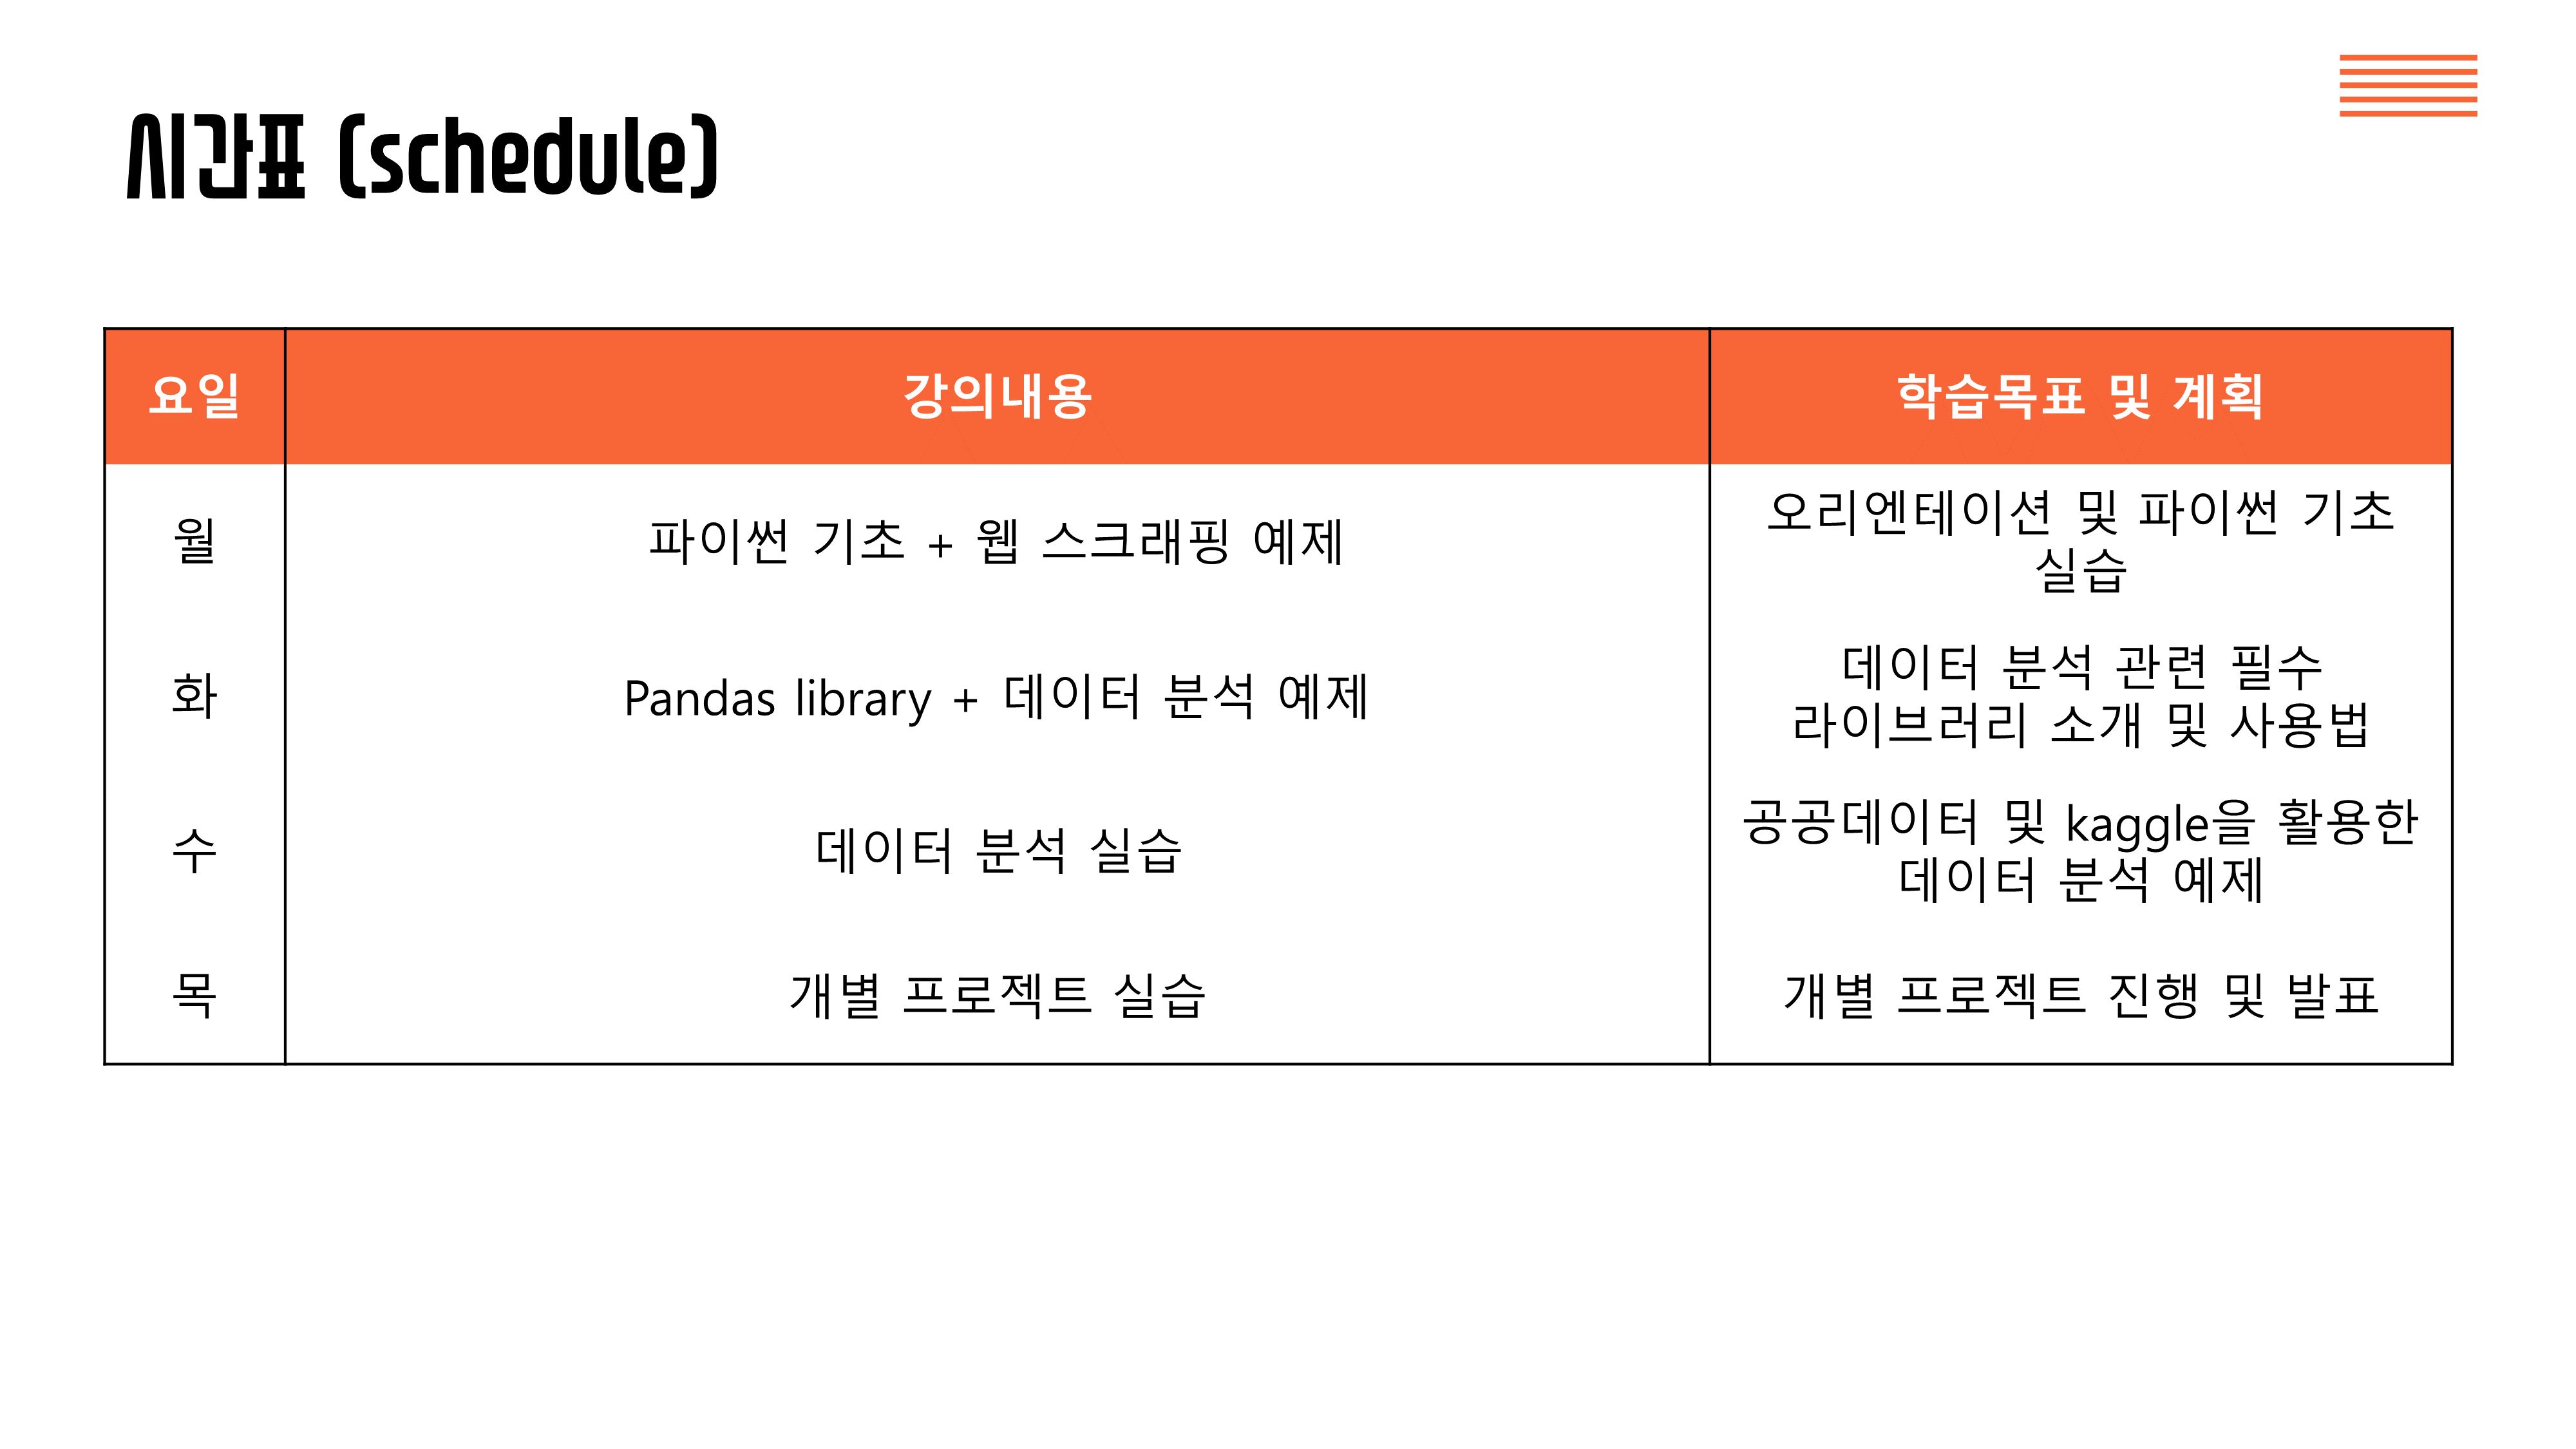

# **한국어 데이터를 사용하기 위한 준비작업**

시각화하는데 폰트가 깨져서 나오지 않게 하기 위한 사전작업.

In [ ]:
# "나눔폰트"를 인스톨
!apt -qq -y install fonts-nanum
%config InlineBackend.figure_format = 'retina' # 더 좋은 해상도 설정 (폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임)

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
print(nanum_font)

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

가끔 이렇게 설정을 해도, 폰트가 깨져서 나오는 경우가 있기 때문에, 여기서 런타임을 재시작 해주는게 좋다.

# **공공데이터 분석**

## **공공데이터란?**

공공데이터란 공공기관이 만들어내는 모든 자료나 정보, 국민 모두의 소통과 협력을 이끌어내는 공적인 정보를 말합니다. 각 공공기관이 보유한 공공데이터 목록과 국민에게 개방할 수 있는 공공데이터를 포털에 등록하면 모두가 공유할 수 있는 양질의 공공데이터로 재탄생하게 됩니다.

(누구나 이용가능한 데이터.)

https://www.data.go.kr/ugs/selectPublicDataUseGuideView.do (보다 자세한 내용은 이곳을 참조)

**상권정보 분석**

https://www.data.go.kr/ (국가에서 제공하는 공공데이터포털)

https://www.data.go.kr/data/15083033/fileData.do (여기서 데이터 다운)

## **필요한 라이브러리 로드**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # 모든 데이터열(column)을 보여주게 하는 기능
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

**대전의 상권정보를 이용**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/one_class/소상공인시장진흥공단_상가(상권)정보_대전_202109.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info() # 여기서 잘못된 부분은?

In [ ]:
df['상가업소번호'] = df['상가업소번호'].astype(str) # 상가업소번호는 고유번호 이기에, 문자열로 전환
df['시도코드'] = df['시도코드'].astype(str) 
df['시군구코드'] = df['시군구코드'].astype(str)

In [ ]:
df['numbers'] = "1"

In [ ]:
df.isnull().sum()

In [ ]:
df.describe() # 대부분이 필요 없는 숫자형 데이터

In [ ]:
# 리스트에 컬럼명 저장
cols = df.columns.tolist() # 굉장히 직관적인 문법 (이런 포인트가 파이썬의 장점)

In [ ]:
df['지점명'].head(10) # 큰 의미는 없는 데이터로 생각

In [ ]:
df.loc[df['지점명']=='대전대흥점'] # 프렌차이즈의 지점명 (그렇게 중요한 데이터는 아니라고 판단)

In [ ]:
df['표준산업분류코드'].unique()

In [ ]:
df['표준산업분류명'].unique()

nunique()을 사용하면, 고유값이 몇 개인지를 반환해준다.

In [ ]:
df['표준산업분류명'].nunique()

In [ ]:
df['표준산업분류코드'].nunique()

http://kssc.kostat.go.kr/ksscNew_web/kssc/common/ClassificationContent.do?gubun=1&strCategoryNameCode=001&categoryMenu=007 (표준산업분류코드 검색)

## **분류가 되지 않은 업소들은 어떤 업소들일까?**

In [ ]:
no_class = df.loc[df['표준산업분류명'].isnull()]
no_class

## **결측치 확인하기**

In [ ]:
df['지번부번지'] # 없어도 상관 없는 데이터로 판단

In [ ]:
df['건물명'] # 없어도 상관은 없다

In [ ]:
df['동정보']  # 없어도 크게 상관이 없는 데이터로 판단

결측치가 많이 보이지만, 분석을 하는데 크게 지장을 주는 데이터가 아니기 때문에, 특별한 처리 없이 진행.

## **대전시내 주요 업종 확인**

In [ ]:
df.groupby(['상권업종대분류명']).count()['numbers'].reset_index().sort_values(['numbers'],ascending=False)

In [ ]:
df.groupby(['상권업종중분류명']).count()['numbers'].reset_index().sort_values(['numbers'],ascending=False).head(20)

In [ ]:
# 가장 많은 업소가 속하는 소분류명 Top 20
micro_segmentation = df.groupby(['상권업종소분류명']).count()['numbers'].reset_index().sort_values(['numbers'],ascending=False).head(20)
micro_segmentation

**x축과 y축에 어떤 데이터 값을 부여하느냐에 따라, 다른 시각화 가능.**

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='numbers',y='상권업종소분류명',data=micro_segmentation, palette='YlGnBu_r')
plt.xlabel("", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("상권업종소분류명", fontweight='bold',fontsize= 15, labelpad = 25)
plt.title(f"대전시내 주요 업종 Top 20", fontweight='bold', pad=15, fontsize=15)
plt.xticks(fontsize = 13, rotation = 0) # rotation을통해 x축에 있는 label의 방향을 조정할 수 있다.
plt.yticks(fontsize = 13)  

## **커피전문점 검색**

In [ ]:
starbucks = df.loc[df['상호명'].str.contains("스타벅스")].reset_index(drop=True)
print(f"대전에는 총 {len(starbucks)}개 스타벅스 지점이 있다") 

In [ ]:
starbucks.head()

In [ ]:
ediya = df.loc[df['상호명'].str.contains("이디야")].reset_index(drop=True)
print(f"대전에는 총 {len(ediya)}개 이디야 지점이 있다") 

In [ ]:
ediya.head()

In [ ]:
baeks = df.loc[df['상호명'].str.contains("빽다방")].reset_index(drop=True)
print(f"대전에는 총 {len(baeks)}개 빽다방 지점이 있다") 

In [ ]:
baeks.head()

## **베스킨라빈스는 어떤 업종으로 분류가 되었을까?**

In [ ]:
# 여러분들이 스스로 해보세요 ~~



## **대전시내 커피전문점 분포에 대해 분석해보자.**

In [ ]:
coffee_shops = df.loc[df['상권업종소분류코드'] == 'Q12A01'].reset_index(drop=True)
print(f"대전에는 총 {len(coffee_shops)}개의 커피숍이 있다") 

**value_counts()를 써서 어떤 브래드 커피점이 많은지 확인해보기**

In [ ]:
coffee_stores = coffee_shops['상호명'].value_counts().reset_index()
coffee_stores.columns = ['상호명','Number']
coffee_stores.head(20)

In [ ]:
df.loc[df['상호명'] =='카페'] # 브랜드 카페는 아니고 개인이 하는, 특별한 상호가 없는 카페라고 생각 됨. (다른 의견이 있다면 말해주세요.)

In [ ]:
starbucks['상호명'].unique()

In [ ]:
ediya['상호명'].unique()

In [ ]:
baeks['상호명'].unique()

## **딕셔너리 생성**

In [ ]:
starbucks_name_list = list(starbucks['상호명'].unique())
starbucks_name_list

dictionary = {'스타벅스대전가수원DT점': "스타벅스"}

In [ ]:
starbucks_dictionary = {} # 빈 딕셔너리 생성
for name in starbucks_name_list:
  if name != "스타벅스":
    starbucks_dictionary[name] = '스타벅스'

In [ ]:
starbucks_dictionary # 딕셔너리를 만든 후, 이걸 이용해서 스타벅스로 통일되게 바꾸어 주는 작업

In [ ]:
ediya_name_list = list(ediya['상호명'].unique())
ediya_name_list

In [ ]:
ediya_dictionary = {} # 빈 딕셔너리 생성
for name in ediya_name_list:
  if name != "이디야커피":
    ediya_dictionary[name] = '이디야커피'

In [ ]:
ediya_dictionary

In [ ]:
baeks_name_list = list(baeks['상호명'].unique())
baeks_name_list

In [ ]:
baeks_dictionary = {} # 빈 딕셔너리 생성
for name in baeks_name_list:
  if name != "빽다방":
    baeks_dictionary[name] = '빽다방'

In [ ]:
baeks_dictionary

**딕셔너리 합치기**

In [ ]:
starbucks_dictionary.update(ediya_dictionary)
starbucks_dictionary

In [ ]:
starbucks_dictionary.update(baeks_dictionary)
starbucks_dictionary

## **딕셔너리와 apply()**

In [ ]:
if "이디야커피프렌차이즈" in starbucks_dictionary:
  print("Yes")

In [ ]:
# 함수 생성
def name_corrector(x):
  if x in starbucks_dictionary:
    return starbucks_dictionary[x]
  else:
    return x

In [ ]:
coffee_shops['상호명수정'] = coffee_shops['상호명'].apply(name_corrector)

In [ ]:
coffee_stores = coffee_shops['상호명수정'].value_counts().reset_index()
coffee_stores.columns = ['상호명수정','Number']
coffee_stores.head(20) #

## **대전시내 Top 20 커피전문점 시각화**

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='상호명수정',y='Number',data=coffee_stores.head(20), palette='YlGnBu_r')
plt.xlabel("상호명", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("", fontweight='bold',fontsize= 15, labelpad = 25)
plt.title(f"대전시내 커피전문점 Top 20", fontweight='bold', pad=15, fontsize=15)
plt.xticks(fontsize = 13, rotation = 90) # rotation을통해 x축에 있는 label의 방향을 조정할 수 있다.
plt.yticks(fontsize = 13)  

## **scatterplot으로 위도/경도 시각화 하기**

* df 데이터프레임을 이용 (1)
* coffee_shops 데이터프레임을 이용 (2)

In [ ]:
plt.figure(figsize=(14,10)) 
sns.scatterplot(x = df['경도'], y= df['위도'], hue= df['상권업종대분류명'], palette='coolwarm')
plt.xlabel("경도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("위도", fontweight='bold',fontsize= 15, labelpad = 25)

In [ ]:
plt.figure(figsize=(14,10)) 
sns.scatterplot(x = coffee_shops['경도'], y= coffee_shops['위도'])
plt.xlabel("경도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("위도", fontweight='bold',fontsize= 15, labelpad = 25)

In [ ]:
plt.figure(figsize=(14,10)) 
sns.scatterplot(x = coffee_shops['경도'], y= coffee_shops['위도'], hue= coffee_shops['시군구명'], palette='YlGnBu_r') # 법정동명
plt.xlabel("경도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("위도", fontweight='bold',fontsize= 15, labelpad = 25)

그림출처: https://ko.wikipedia.org/wiki/%EB%8C%80%EC%A0%84%EA%B4%91%EC%97%AD%EC%8B%9C%EC%9D%98_%ED%96%89%EC%A0%95_%EA%B5%AC%EC%97%AD

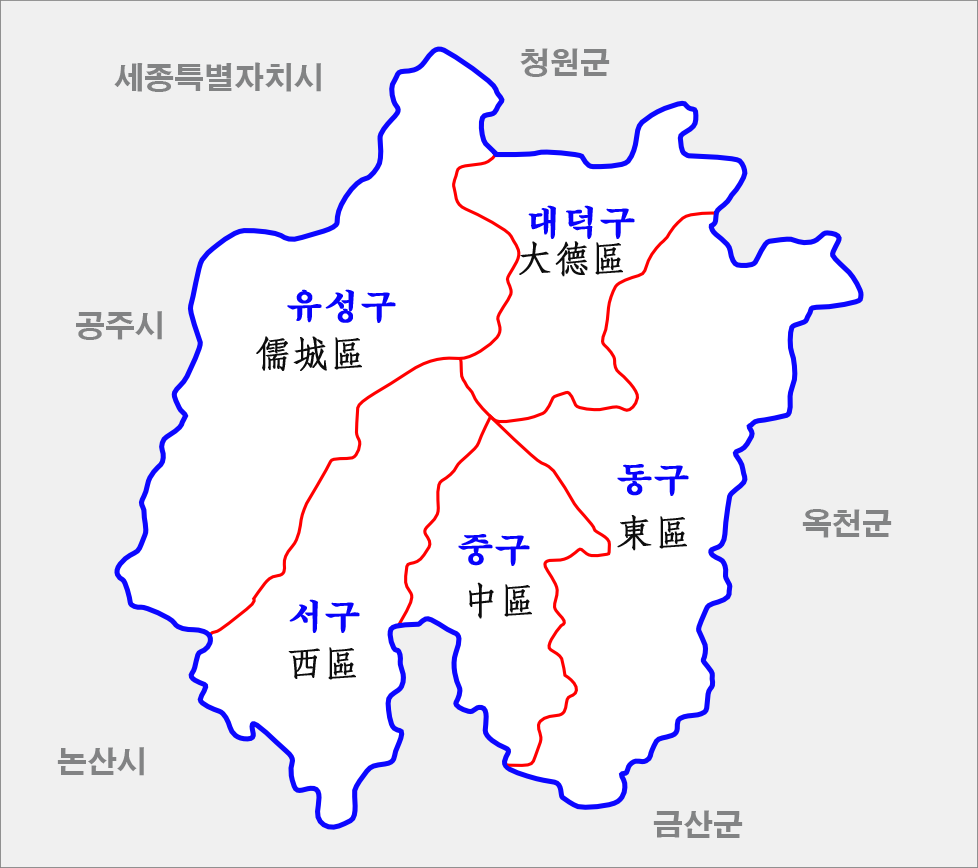

## **스타벅스 VS 이디야 비교**

http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015 (스타벅스 vs 이디야)

In [ ]:
# 스타벅스와 이디야만 포함된 새로운 데이터프레임을 생성
data = df.loc[df['상호명'].str.contains("스타벅스|이디야")].reset_index(drop=True) # 여기서 "스타벅스|이디야"는 "스타벅스 또는 이디야"를 의미
print(len(data))

In [ ]:
starbucks_dictionary

In [ ]:
def name_corrector(x):
  if x in starbucks_dictionary:
    return starbucks_dictionary[x]
  else:
    return x

In [ ]:
data['브랜드명'] = data['상호명'].apply(name_corrector) # 상호명을 통일 해주는 작업

In [ ]:
data

## **Folium을 사용한 시각화**

In [ ]:
map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=13)  # 지도의 중심값

for n in data.index:
    # 팝업에 들어갈 내용.
    popup_name = data.loc[n, '상호명'] + ' - ' + data.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 다르게 나타내주는 옵션.
    if data.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    
    folium.CircleMarker(
        location=[data.loc[n,'위도'], data.loc[n, '경도']],
        radius=8,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

In [ ]:
map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in data.index:
    # 팝업에 들어갈 내용.
    popup_name = data.loc[n, '상호명'] + ' - ' + data.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 다르게 나타내주는 옵션.
    if data.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    folium.CircleMarker(
        location=[data.loc[n,'위도'], data.loc[n, '경도']],
        radius=8,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## **groupby()를 이용한 스타벅스 vs 이디야 비교**

In [ ]:
grouped_data = data.groupby(['시군구명', '브랜드명']).count()['numbers'].reset_index()
grouped_data.columns = ['시군구명','브랜드명','매장수']
grouped_data

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='시군구명', y='매장수', hue='브랜드명', palette='crest')
plt.xlabel("시군구명", fontweight='bold',fontsize= 15, labelpad = 20)
plt.ylabel("매장수", fontweight='bold',fontsize= 15, labelpad = 20)

In [ ]:
district_data = data.groupby(['시군구명']).count()['numbers'].reset_index()
district_data.columns = ['시군구명','매장수']
district_data

## **던킨과 베스킨라빈스 비교**

In [ ]:
br_korea = df.loc[df['상호명'].str.contains('베스킨|배스킨|던킨')].reset_index(drop=True)
br_korea

In [ ]:
baskin = df.loc[df['상호명'].str.contains("배스킨|베스킨")].reset_index(drop=True)

In [ ]:
dunkin = df.loc[df['상호명'].str.contains("던킨")].reset_index(drop=True)

In [ ]:
print(len(br_korea))
print(len(baskin))
print(len(dunkin))

In [ ]:
br_name_list = list(baskin['상호명'].unique())
br_name_list

In [ ]:
baskin_dictionary = {} # 빈 딕셔너리 생성
for name in br_name_list:
  if name != "배스킨라빈스":
    baskin_dictionary[name] = '배스킨라빈스'

In [ ]:
baskin_dictionary

In [ ]:
dk_name_list = list(dunkin['상호명'].unique())
dk_name_list

In [ ]:
dunkin_dictionary = {} # 빈 딕셔너리 생성
for name in dk_name_list:
  if name != "던킨":
    dunkin_dictionary[name] = '던킨'

In [ ]:
dunkin_dictionary

In [ ]:
baskin_dictionary.update(dunkin_dictionary)

In [ ]:
baskin_dictionary

In [ ]:
# 함수 생성
def name_corrector2(x):
  if x in baskin_dictionary:
    return baskin_dictionary[x]
  else:
    return x

In [ ]:
br_korea['브랜드명'] = br_korea['상호명'].apply(name_corrector2)

In [ ]:
br_korea # 상권업종소분류명에 차이가 있는 걸 발견

In [ ]:
df_br = br_korea['브랜드명'].value_counts().reset_index()
df_br.columns = ['브랜드명','Number']
df_br.head(20) #

In [ ]:
map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for n in br_korea.index:
    
    popup_name = br_korea.loc[n, '브랜드명'] + ' - ' + br_korea.loc[n, '도로명주소']
    
    if br_korea['브랜드명'][n] == '던킨' :
        icon_color = 'orange'
    else:
        icon_color = 'pink'    
    
    folium.Marker([br_korea.loc[n, '위도'], br_korea.loc[n, '경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

# **공공데이터 분석 2**

https://kosis.kr/search/search.do?query=%EC%B6%9C%EC%83%9D%EC%95%84%EC%88%98 (통계청 출생아수)

## **데이터 불러오기**

In [ ]:
population = pd.read_csv("/content/drive/MyDrive/one_class/출생아수_시도_시_군_구__20220119024643.csv", encoding = 'cp949')

In [ ]:
population.shape

In [ ]:
population.head() # 월 별 데이터

## **melt()를 이용한 데이터 재구조화**

In [ ]:
df = population.melt(id_vars = '시군구별')
df

In [ ]:
df.shape

In [ ]:
df['시군구별'].unique()

In [ ]:
df.loc[df['시군구별'] == '시군구별'] # 이 내용은 필요 없음

## **데이터 정제**

In [ ]:
df.loc[df['시군구별'] != '시군구별'] 

In [ ]:
cleaned = df.loc[df['시군구별'] != '시군구별'].reset_index(drop=True)
cleaned

In [ ]:
cleaned.shape

In [ ]:
cleaned.isnull().sum()

In [ ]:
cleaned['시군구별'].unique()

In [ ]:
cleaned['variable'].str.split(".")

In [ ]:
cleaned['variable'].str.split(".", expand=True) # 데이터프레임 형태로 반환

In [ ]:
cleaned['variable'].str.split(".", expand=True)[0] # 여기서 주의 !!! 0은 인덱싱이 아니라, 컬럼을 선택 (컬럼의 이름이 0, 1, 2)

In [ ]:
cleaned['연도'] = cleaned['variable'].str.split(".", expand=True)[0]

In [ ]:
cleaned['월'] = cleaned['variable'].str.split(".", expand=True)[1]
cleaned['성별'] = cleaned['variable'].str.split(".", expand=True)[2]

In [ ]:
cleaned.head()

In [ ]:
cleaned.tail()

In [ ]:
cleaned['성별'].unique()

In [ ]:
cleaned['성별'] = cleaned['성별'].fillna("전체")
cleaned.head()

In [ ]:
cleaned['성별'] = cleaned['성별'].replace("1", "남자").replace("2", "여자")
cleaned.tail()

In [ ]:
cleaned['성별'].value_counts()

In [ ]:
cleaned = cleaned.rename(columns= {"variable":"날짜","value":"출생아수"})

In [ ]:
cleaned.info()

In [ ]:
cleaned['출생아수'] = cleaned['출생아수'].astype(int) # 에러가 난다

In [ ]:
import numpy as np
cleaned['출생아수'] = cleaned['출생아수'].replace("-", np.nan)

In [ ]:
cleaned['출생아수'] = cleaned['출생아수'].astype(float)

In [ ]:
cleaned['출생아수'].describe()

## **전국 트렌드**

In [ ]:
cleaned.loc[(cleaned['시군구별'] == '전국')]

In [ ]:
df_all = cleaned.loc[(cleaned['시군구별'] == '전국') & (cleaned['성별'] == '전체')]
df_all

## **데이터 시각화**

In [ ]:
df_all.set_index(['연도','월']).plot(figsize=(16,6)) # 계절성을 띤다. (늘어났다 줄어들었다)

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='연도',y='출생아수',data=df_all, ci=None)

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='연도',y='출생아수',data=df_all, ci=None, hue='월')

In [ ]:
df_all.set_index(['연도','월']).plot.bar(figsize=(16,6)) # 제대로 이해하기 힘듬

In [ ]:
df_all[-24:].set_index(['연도','월']).plot.bar(figsize=(16,6)) # 최근 2년의 데이터만 본다

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='연도',y='출생아수',data=df_all, palette='YlGnBu_r')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("출생아수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)  # 오차 막대 (에러바)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='날짜',y='출생아수',data=df_all.tail(24), palette='YlGnBu_r')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("출생아수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)  

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='날짜',y='출생아수',data=df_all.tail(36), palette='YlGnBu_r')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("출생아수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)  

In [ ]:
df_all

https://www.sjsori.com/news/articleView.html?idxno=52939 (출산율 문제)

In [ ]:
cleaned['시군구별'] != '전국'

In [ ]:
local = cleaned.loc[cleaned['시군구별'] != '전국']

In [ ]:
local

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(data = local, x='연도',y='출생아수', hue='성별')

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(data = local, x='연도',y='출생아수', hue='시군구별')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
local = local.loc[local['시군구별'].isin(["대전광역시","세종특별자치시", "충청남도"])].reset_index(drop=True)
local

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(data = local, x = '연도' , y ='출생아수', hue = '시군구별' )

# **kaggle 실습**

https://www.kaggle.com/

실습내용: 원하는 데이터를 찾고, 다운 받아서 Colab 환경에서 불러오기.

https://www.kaggle.com/unsdsn/world-happiness (우리는 행복할까?)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/one_class/2019.csv")

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
# 리스트에 컬럼명 저장
cols = df.columns.tolist() # 굉장히 직관적인 문법 (이런 포인트가 파이썬의 장점)
cols

In [ ]:
df.describe()

In [ ]:
sns.histplot(df['Score'], kde=True) # 정규분포의 성격을 가지고 있다.

In [ ]:
top10 = df.groupby(['Country or region'], sort=False)['Score'].max().head(10).reset_index()
top10

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x="Country or region", y="Score", data=top10, palette=("Spectral"))
plt.xlabel("Country", fontweight='bold', fontsize=25, labelpad = 25)
plt.ylabel("Happiness score", fontweight='bold', fontsize=25, labelpad = 25)
plt.title("Top 10 Happiest Countries", fontweight='bold', pad=10 , fontsize=25)
plt.xticks(fontsize = 13, rotation = 90) # rotation을통해 x축에 있는 label의 방향을 조정할 수 있다.
plt.yticks(fontsize = 13) 

In [ ]:
lower_value = top10['Score'].min()-0.2
upper_value = top10['Score'].max()+0.2

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x="Country or region", y="Score", data=top10, palette=("Spectral"))
ax.set_ylim(7, 8)   
ax.set_ylim(lower_value, upper_value) 
plt.xlabel("Country", fontweight='bold', fontsize=25, labelpad = 25)
plt.ylabel("Happiness score", fontweight='bold', fontsize=25, labelpad = 25)
plt.title("Top 10 Happiest Countries", fontweight='bold', pad=10 , fontsize=25)
plt.xticks(fontsize = 13, rotation = 90) # rotation을통해 x축에 있는 label의 방향을 조정할 수 있다.
plt.yticks(fontsize = 13) 

In [ ]:
unhappy10 = df.groupby(['Country or region'], sort=False)['Score'].max().sort_values(ascending=False).tail(10).reset_index()
unhappy10

In [ ]:
unhappy10_sorted = unhappy10.sort_values(['Score'], ascending=True)
unhappy10_sorted

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x="Country or region", y="Score", data=unhappy10_sorted, palette=("Spectral"))
plt.xlabel("Country", fontweight='bold', fontsize=25, labelpad = 25)
plt.ylabel("Happiness score", fontweight='bold', fontsize=25, labelpad = 25)
plt.title("Top 10 Happiest Countries", fontweight='bold', pad=10 , fontsize=25)
plt.xticks(fontsize = 13, rotation = 90) # rotation을통해 x축에 있는 label의 방향을 조정할 수 있다.
plt.yticks(fontsize = 13) 

In [ ]:
df[df['Country or region'].str.contains('Korea')]

In [ ]:
print(df['Score'].median())
print(df['Score'].mean())

In [ ]:
corrmat = df.corr()

In [ ]:
corrmat

In [ ]:
mask = np.zeros_like(corrmat, dtype=np.bool) # 상관관계는 대칭을 이루기 때문에, 실질적으로 절반의 데이터만 필요. 그 절반을 가려주는 역할을 여기서 한다
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corrmat, 
            cmap = 'YlGnBu', 
            annot = True, fmt= ".2f",  # Displaying value
            mask=mask,      # masking
            linewidths=.5,center= 0 ,
            )  
plt.title('Correlation heatmap of happiness data', fontsize=20)

In [ ]:
from scipy.stats import pearsonr

# calculating Pearson's correlations
corr, pvalue = pearsonr(df['Score'].values, df['GDP per capita'].values)

print('Pearson: {:.2f}'.format(corr))
print('p-value: {:.2f}'.format(pvalue))

In [ ]:
# calculating Pearson's correlations
corr, pvalue = pearsonr(df['Score'].values, df['Social support'].values)

print('Pearson: {:.2f}'.format(corr))
print('p-value: {:.2f}'.format(pvalue))

In [ ]:
# calculating Pearson's correlations
corr, pvalue = pearsonr(df['Score'].values, df['Healthy life expectancy'].values)

print('Pearson: {:.2f}'.format(corr))
print('p-value: {:.2f}'.format(pvalue))

In [ ]:
# calculating Pearson's correlations
corr, pvalue = pearsonr(df['Score'].values, df['Freedom to make life choices'].values)

print('Pearson: {:.2f}'.format(corr))
print('p-value: {:.2f}'.format(pvalue))

In [ ]:
# calculating Pearson's correlations
corr, pvalue = pearsonr(df['Score'].values, df['Generosity'].values)

print('Pearson: {:.2f}'.format(corr))
print('p-value: {:.2f}'.format(pvalue)) # 유효하지 않다

In [ ]:
# calculating Pearson's correlations
corr, pvalue = pearsonr(df['Score'].values, df['Perceptions of corruption'].values)

print('Pearson: {:.2f}'.format(corr))
print('p-value: {:.2f}'.format(pvalue)) 

In [ ]:
test = ["eat","sleep","repeat"]
for i in enumerate(test):
    print (i)

In [ ]:
plt.figure(figsize=(16, 10))
for i, key in enumerate(['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']):
    plt.subplot(2, 3, i+1)
    plt.xlabel(key)
    plt.ylabel("Score")
    plt.scatter(df[key], df['Score'], alpha=0.5)

In [ ]:
sns.regplot(x = "GDP per capita",y = "Score",data = df) 

In [ ]:
df_region = df = pd.read_csv("/content/drive/MyDrive/one_class/happiness_data.csv")
df_region

In [ ]:
df_region.info()

In [ ]:
df_region['Country or region'] = df_region['Country']

In [ ]:
df.shape

In [ ]:
all= pd.merge(df, df_region, how='left')
all

In [ ]:
# correlation for Asia
corr_asia = all[all['Region'].str.contains('Asia')].corr()
mask = np.zeros_like(corr_asia, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_title("Asia")
sns.heatmap(corr_asia, annot=True,fmt= ".2f",square=True, cmap="RdBu",mask=mask)
#plt.savefig('Asia_Heatmap.png',dpi = 200)

In [ ]:
# Correlation for Africa
corr_africa = all[all['Region'].str.contains('Africa')].corr()
mask = np.zeros_like(corr_africa, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_title("Africa")
sns.heatmap(corr_africa, annot=True,fmt= ".2f",square=True, cmap="Greens",mask=mask)

In [ ]:
# Correlation for Europe
corr_europe = all[all['Region'].str.contains('Europe')].corr()
mask = np.zeros_like(corr_europe, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_title("Europe")
sns.heatmap(corr_europe, annot=True,fmt= ".2f",square=True, cmap="Reds",mask=mask)

In [ ]:
# Correlation for America
corr_america = all[all['Region'].str.contains('America')].corr()
mask = np.zeros_like(corr_america, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,10))
ax = plt.axes()
ax.set_title("America")
sns.heatmap(corr_america, annot=True,fmt= ".2f",square=True, cmap="Blues",mask=mask)